In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('Dataset.csv')

In [5]:
df.head(2)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11814183,JC416371,2019-09-01 09:00:00+00:00,038XX S ELLIS AVE,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,4.0,36,07,1182584.0,1879629.0,2019,2019-09-08 16:07:45+00:00,41.824914,-87.605655,"(41.824914418, -87.605655435)"
1,11770356,JC363819,2019-07-25 09:52:00+00:00,049XX N MILWAUKEE AVE,1120,DECEPTIVE PRACTICE,FORGERY,STREET,True,False,...,45.0,11,10,1139437.0,1932199.0,2019,2019-10-14 16:04:15+00:00,41.970067,-87.762668,"(41.970066618, -87.762668225)"


In [6]:
columns = df.columns.tolist()
print(columns)

['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type', 'description', 'location_description', 'arrest', 'domestic', 'beat', 'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude', 'location']


In [7]:
df.describe()

,unique_key,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
count,3.000000e+04,30000.000000,30000.000000,29999.000000,30000.000000,2.949400e+04,2.949400e+04,30000.000000,29494.000000,29494.000000
mean,7.101561e+06,1006.345600,9.426867,17.495517,44.357533,1.167592e+06,1.868557e+06,2009.809200,41.794834,-87.661061
std,2.962270e+06,648.737593,6.281632,13.211404,18.816589,2.373540e+04,3.957639e+04,5.038006,0.109021,0.085880
min,6.900000e+02,131.000000,1.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,4.521324e+06,433.000000,4.000000,8.000000,34.000000,1.149427e+06,1.838758e+06,2005.000000,41.712860,-87.727183
50%,7.212875e+06,815.000000,8.000000,11.000000,50.000000,1.174886e+06,1.862644e+06,2009.000000,41.779239,-87.633948
75%,9.758444e+06,1613.000000,16.000000,23.000000,57.000000,1.185782e+06,1.882132e+06,2014.000000,41.832205,-87.595355
max,1.186182e+07,2512.000000,31.000000,50.000000,74.000000,1.205119e+06,1.949924e+06,2019.000000,42.018925,-87.524529


In [8]:
df.count()

unique_key              30000
case_number             30000
date                    30000
block                   30000
iucr                    30000
primary_type            30000
description             30000
location_description    29898
arrest                  30000
domestic                30000
beat                    30000
district                30000
ward                    29999
community_area          30000
fbi_code                30000
x_coordinate            29494
y_coordinate            29494
year                    30000
updated_on              30000
latitude                29494
longitude               29494
location                29494
dtype: int64

In [9]:
# finding out all the columns that have NANs
columnsNAN = df.columns[df.isna().any()].tolist()

In [10]:
print(columnsNAN)

['location_description', 'ward', 'x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'location']


In [11]:
# number of NANs present in the columns that do have NANs
print(df[columnsNAN].isna().sum())

location_description    102
ward                      1
x_coordinate            506
y_coordinate            506
latitude                506
longitude               506
location                506
dtype: int64


In [12]:
# finding which of the columns that have NANs are categorical and numerical respectively
for column in columnsNAN:
    print(column, '->', df[column].dtype)

location_description -> object
ward -> float64
x_coordinate -> float64
y_coordinate -> float64
latitude -> float64
longitude -> float64
location -> object


In [13]:
import numpy as np

In [14]:
# filing up missing values with NANs
df[columnsNAN == ''] = np.NaN

All the NANs for categorical columns being replaced with its previous row values. 
All the NANs for numeric columns being replaced with the mean of that column.

In [15]:
df[['location','location_description']] = df[['location','location_description']].fillna(method = 'ffill')

In [16]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [17]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [18]:
df['x_coordinate'] = df['x_coordinate'].fillna(df['x_coordinate'].mean())

In [19]:
df['y_coordinate'] = df['y_coordinate'].fillna(df['y_coordinate'].mean())

In [20]:
df['ward'] = df['ward'].fillna(df['ward'].mean())

In [21]:
# NANs have been filled
print(df[columnsNAN].isna().sum())

location_description    0
ward                    0
x_coordinate            0
y_coordinate            0
latitude                0
longitude               0
location                0
dtype: int64


In [22]:
df.head(2)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,False
0,11814183,JC416371,2019-09-01 09:00:00+00:00,038XX S ELLIS AVE,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,36,07,1182584.0,1879629.0,2019,2019-09-08 16:07:45+00:00,41.824914,-87.605655,"(41.824914418, -87.605655435)",NaN
1,11770356,JC363819,2019-07-25 09:52:00+00:00,049XX N MILWAUKEE AVE,1120,DECEPTIVE PRACTICE,FORGERY,STREET,True,False,...,11,10,1139437.0,1932199.0,2019,2019-10-14 16:04:15+00:00,41.970067,-87.762668,"(41.970066618, -87.762668225)",NaN


In [23]:
# dropping a column that was created unnecessarily
df = df.drop(False, axis = 1)

In [24]:
df.head(2)

,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,11814183,JC416371,2019-09-01 09:00:00+00:00,038XX S ELLIS AVE,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,...,4.0,36,07,1182584.0,1879629.0,2019,2019-09-08 16:07:45+00:00,41.824914,-87.605655,"(41.824914418, -87.605655435)"
1,11770356,JC363819,2019-07-25 09:52:00+00:00,049XX N MILWAUKEE AVE,1120,DECEPTIVE PRACTICE,FORGERY,STREET,True,False,...,45.0,11,10,1139437.0,1932199.0,2019,2019-10-14 16:04:15+00:00,41.970067,-87.762668,"(41.970066618, -87.762668225)"


In [25]:
from sklearn import preprocessing

In [26]:
from numpy import mean, std

In [27]:
# finding out all the columns that are numeric in nature
numericList = df.select_dtypes(include = np.number).columns.tolist()

In [28]:
print(numericList)

['unique_key', 'beat', 'district', 'ward', 'community_area', 'x_coordinate', 'y_coordinate', 'year', 'latitude', 'longitude']


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

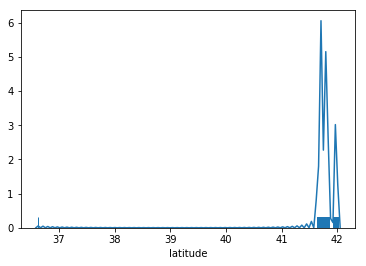

In [34]:
# as expected, the latitude cannot be normally distributed
sns.distplot(df['latitude'], hist = False, rug = True)
plt.show()

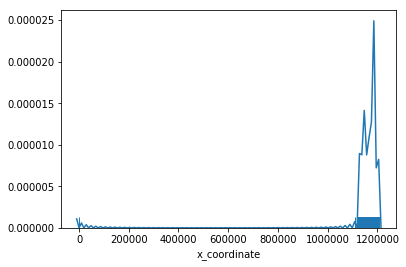

In [36]:
# as expected, the x_coordinate's cannot be normally distributed
sns.distplot(df['x_coordinate'], hist = False, rug = True)
plt.show()

In [37]:
from statsmodels.graphics.gofplots import qqplot

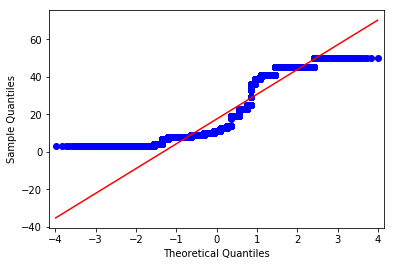

In [38]:
# demonstrating how the variable ward number isn't normally distributed
quantilePlot = qqplot(df['ward'], line = 's')

In [39]:
from scipy.stats import shapiro

In [42]:
# Shapiro test to check for normality
stat, p = shapiro(df['longitude'])

C:\Users\91974\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [43]:
print("Statistic = ", stat)
print("p-value = ", p)

Statistic =  0.8480120897293091
p-value =  0.0


From the above visualizations and normality tests, we can conclude that our dataset is not normal. 
However, it makes no sense to normalize columns in our case where all the data is factual.
Hence, we have commented it out.

In [44]:
# x = df[numericsList].values 
# min_max_scaler = preprocessing.MinMaxScaler()
# x = min_max_scaler.fit_transform(x)

HYPOTHESIS TESTING

Approximately 25 communities have registered cases pertaining to domestic violence based on official records

In [45]:
# finding out all those rows that have domestic violence
dfDomestic = df.loc[df['domestic'] != False] 

In [46]:
# identifying which communities have domestic violence so that we can appoint family counsellors for those areas
dfDomestic.groupby('community_area').size()

community_area
9      34
10    126
11    121
12     36
13     65
18     82
34     63
36    104
37     78
45    168
47     64
48    196
50    163
52    169
54    257
55     70
57     74
59     79
62    101
64    134
72     98
74    107
dtype: int64

In [47]:
print('Number of communities that have domestic violence cases = ', dfDomestic.groupby('community_area').size().count())

Number of communities that have domestic violence cases =  22


Beat no. 1133 has the most number of criminal cases registered based on an article by the Chicago Sun-Times

In [48]:
# finding out all the beat's that have criminal cases registered under their jurisdiction
dfBeat = df[['beat']]

In [49]:
dfBeatCount = dfBeat.groupby('beat').size().tolist()
dfBeatCountMax = dfBeat.groupby('beat').size().max()

In [50]:
maxBeatIndex = 0
for i in dfBeatCount:
    if i == dfBeatCountMax:
        maxBeatIndex = dfBeatCount.index(i)

In [51]:
# identifying which beat has maximum cases to increase the police surveilance in that area
print('Police beat ID that has maximum number of cases :')
print(dfBeat.iloc[maxBeatIndex])

Police beat ID that has maximum number of cases :
beat    533
Name: 28, dtype: int64


After the 2008 recession in the US, a lot of people lost their jobs, hence the crime rate would have been really high in 2008.

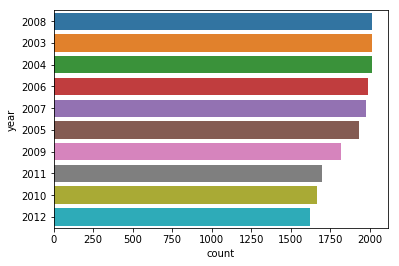

In [64]:
cPlot1 = sns.countplot(y = 'year', data = df, order = pd.value_counts(df['year']).iloc[:10].index)

Areas having a majority black population account for more crimes

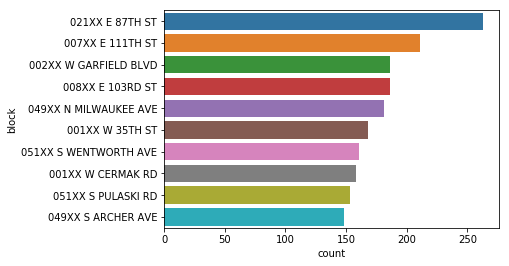

In [53]:
cPlot2 = sns.countplot(y = 'block', data = df, order = pd.value_counts(df['block']).iloc[:10].index)

48.1% of the people living on 87th street and 40% of the people living on 11th street happen to be blacks.
These account for the top 2 blocks where crime is most prevalent in Chicago.

Trying to get a visual perspective on the type of crimes prevalent in the city of Chicago

In [54]:
df.groupby('description').size()

description
ABUSE/NEGLECT: CARE FACILITY                                     2
AGG CRIM SEX ABUSE FAM MEMBER                                   71
AGG CRIMINAL SEXUAL ABUSE                                       91
AGG PO HANDS ETC SERIOUS INJ                                    10
AGG PO HANDS NO/MIN INJURY                                     331
AGG PRO EMP HANDS SERIOUS INJ                                    7
AGG PRO.EMP: HANDGUN                                            11
AGG PRO.EMP: OTHER DANG WEAPON                                  53
AGG PRO.EMP: OTHER FIREARM                                       1
AGG PRO.EMP:KNIFE/CUTTING INST                                   9
AGG SEX ASSLT OF CHILD FAM MBR                                  47
AGG: FINANCIAL ID THEFT                                         57
AGG: HANDS/FIST/FEET NO/MINOR INJURY                            88
AGG: HANDS/FIST/FEET SERIOUS INJURY                             47
AGGRAVATED                                        

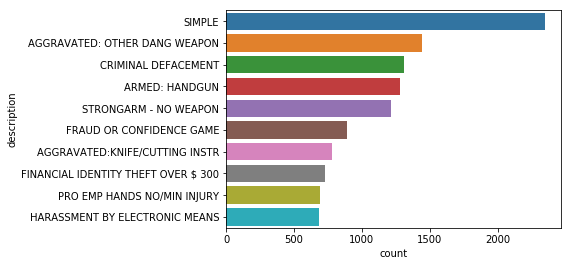

In [55]:
# plotting the 10 most prevalent type of crimes in the city
ax = sns.countplot(y = 'description', data = df, order = pd.value_counts(df['description']).iloc[:10].index)

As expected, simple crimes have the maximum occurrence. 
However, armed crimes are gaining ground which is alarming. 
As a solution, gun laws must be made a lot stricter.

Obtaining a correlation table to see how the variables are related to each other

In [56]:
df.corr()

,unique_key,arrest,domestic,beat,district,ward,community_area,x_coordinate,y_coordinate,year,latitude,longitude
unique_key,1.000000,-0.047983,0.045177,-0.027471,0.019729,0.024172,-0.039544,-0.029051,0.038404,0.972400,0.038376,-0.028900
arrest,-0.047983,1.000000,-0.049875,-0.039044,-0.042870,-0.044896,0.011308,0.024395,-0.016190,-0.041227,-0.016268,0.024764
domestic,0.045177,-0.049875,1.000000,-0.007683,-0.009228,-0.014630,0.011679,0.017179,-0.033624,0.042448,-0.033573,0.016908
beat,-0.027471,-0.039044,-0.007683,1.000000,0.914914,0.676362,-0.313198,-0.616434,0.514634,-0.035241,0.515493,-0.618126
district,0.019729,-0.042870,-0.009228,0.914914,1.000000,0.729379,-0.289338,-0.676588,0.508521,0.013009,0.509669,-0.679272
ward,0.024172,-0.044896,-0.014630,0.676362,0.729379,1.000000,-0.671515,-0.739765,0.775942,0.016561,0.776259,-0.740210
community_area,-0.039544,0.011308,0.011679,-0.313198,-0.289338,-0.671515,1.000000,0.366592,-0.784118,-0.036495,-0.782675,0.362058
x_coordinate,-0.029051,0.024395,0.017179,-0.616434,-0.676588,-0.739765,0.366592,1.000000,-0.607928,-0.023155,-0.609085,0.999870
y_coordinate,0.038404,-0.016190,-0.033624,0.514634,0.508521,0.775942,-0.784118,-0.607928,1.000000,0.033005,0.999994,-0.609446
year,0.972400,-0.041227,0.042448,-0.035241,0.013009,0.016561,-0.036495,-0.023155,0.033005,1.000000,0.032973,-0.023005
